# (a)

In [88]:
import numpy as np
import matplotlib.pyplot as plt
X_and_Y = np.load('./q2-parabola.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

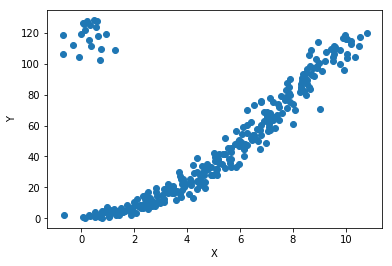

In [89]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [90]:
# Assume Y = w0 + w1*X + w2*Xˆ2 = (w0, w1, w2).(1, X, Xˆ2) = W.X2
# X2 contains 1, X and Xˆ2.
X2 = np.matrix(np.hstack((np.ones((len(X),1)),X.reshape(-1,1),np.square(X.reshape(-1,1)))))
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = 51.07 + -16.06*X + 2.36*Xˆ2


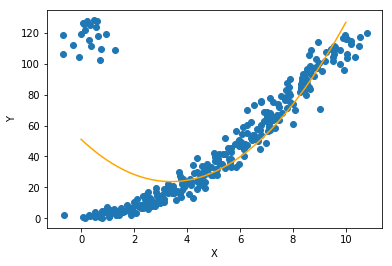

In [91]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# (b)

In [94]:
X_L1 = np.matrix(np.hstack((np.ones((len(X),1)),X.reshape(-1,1),np.square(X.reshape(-1,1)))))
W_L1 = np.random.random((1,3))

In [95]:
MAX_ITERATION = 300000
LEARNING_RATE = 0.000001
STOP_CRITERIA = 0.00001

In [96]:
for count in range(MAX_ITERATION):
    error = X_L1.dot(W_L1.T) - Y.reshape(len(X),1)
    if np.sum(np.abs(error))<=STOP_CRITERIA:
        break
    W_L1_grad = np.array(np.sign(error).T.dot(X_L1))
    W_L1_delta = W_L1_grad * LEARNING_RATE
    W_L1 -= W_L1_delta

In [97]:
w0_L1, w1_L1, w2_L1 = np.array(W_L1).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0_L1, w1_L1, w2_L1))

Y = 1.69 + 1.12*X + 1.05*Xˆ2


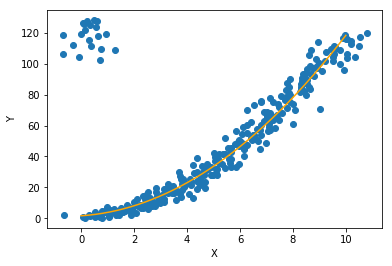

In [98]:
X_line = np.linspace(0,10,300)
Y_line = w0_L1 + w1_L1 * X_line + w2_L1 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()